In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Function to add Salt and Pepper noise to an image
def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = image.copy()
    total_pixels = image.size

    # Add Salt noise
    num_salt = int(np.ceil(salt_prob * total_pixels))
    salt_coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
    noisy_image[salt_coords[0], salt_coords[1]] = 1

    # Add Pepper noise
    num_pepper = int(np.ceil(pepper_prob * total_pixels))
    pepper_coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
    noisy_image[pepper_coords[0], pepper_coords[1]] = 0

    return noisy_image

# Function to add Gaussian noise to an image
def add_gaussian_noise(image, mean=0, sigma=25):
    gaussian_noise = np.random.normal(mean, sigma, image.shape)
    noisy_image = image + gaussian_noise
    return np.clip(noisy_image, 0, 255).astype(np.uint8)

# Function to remove Salt and Pepper noise using median filter
def remove_salt_and_pepper_noise(image, kernel_size=3):
    return cv2.medianBlur(image, kernel_size)

# Function to minimize Gaussian noise using a Weiner filter
def minimize_gaussian_noise(image, noise_var=25):
    return cv2.fastNlMeansDenoising(image, None, noise_var)

In [ ]:
# Load a grayscale image (replace with your image path)
image_path = '/content/test.jpeg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Add Salt and Pepper noise
noisy_image_sp = add_salt_and_pepper_noise(img, salt_prob=0.02, pepper_prob=0.02)

# Add Gaussian noise
noisy_image_gaussian = add_gaussian_noise(img)

# Remove Salt and Pepper noise using Median filter
restored_image_sp = remove_salt_and_pepper_noise(noisy_image_sp)

# Minimize Gaussian noise using Weiner filter
restored_image_gaussian = minimize_gaussian_noise(noisy_image_gaussian)

# Display the original, noisy, and restored images
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

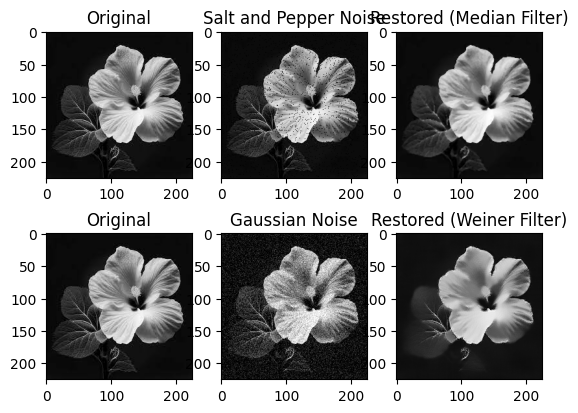

In [ ]:
plt.subplot(231), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(232), plt.imshow(noisy_image_sp, cmap='gray'), plt.title('Salt and Pepper Noise')
plt.subplot(233), plt.imshow(restored_image_sp, cmap='gray'), plt.title('Restored (Median Filter)')

plt.subplot(234), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(235), plt.imshow(noisy_image_gaussian, cmap='gray'), plt.title('Gaussian Noise')
plt.subplot(236), plt.imshow(restored_image_gaussian, cmap='gray'), plt.title('Restored (Weiner Filter)')

plt.show()